# CNN with MNIST Data

- Classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 categories (0 to 9).

## 이미지 로드 및 확인

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [2]:
(train_image, train_label), (test_image, test_label)=mnist.load_data()

In [3]:
type(train_image), type(train_label)

(numpy.ndarray, numpy.ndarray)

In [4]:
train_image.shape

(60000, 28, 28)

In [5]:
img5=train_image[5]
img5

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

2


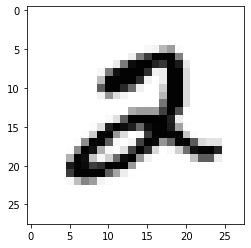

In [7]:
plt.imshow(img5, cmap='Greys')
print(train_label[5])

In [8]:
img5.max(), img5.min()

(255, 0)

## 전처리
- image를 모델에 넣기위한 형태로 변환

##### 1. 숫자들을 0 ~ 1 사이의 숫자로 변환

In [10]:
X_train=train_image/255
X_test=test_image/255

y_train=train_label
y_test=test_label

In [11]:
X_train.min(), X_train.max()

(0.0, 1.0)

In [17]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28))

##### 2. 마지막 축을 추가하여 (높이, 너비, 채널) 형태로 변환 즉, 채널 축 추가

In [20]:
X_train=X_train.reshape((60000,28,28,1))
X_test=X_test.reshape((10000,28,28,1))
# X_train=X_train[..., np.newaxis] 다른 방법 단, 실행할때마다 축이 추가되므로 변수명을 다른것으로 주거나 추가 횟수만큼만 실행해야함

In [21]:
X_train.shape, X_test.shape  # 사진개수: 60000, 크기: 28*28, 채널수: 1

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [24]:
np.unique(y_train)  # class: 0 ~ 9, 다중분류 => y를 OneHot Encoding (이진분류일때는 하지않아도 됨)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [35]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(train_label)
y_test=to_categorical(test_label)

In [36]:
np.unique(y_train), np.unique(y_test)

(array([0., 1.], dtype=float32), array([0., 1.], dtype=float32))

In [37]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## CNN model을 이용한 MNIST 분류

In [38]:
from tensorflow.keras import models, layers

### 모델생성

In [45]:
model=models.Sequential() # Sequential: 왼쪽에서 오른쪽으로 쌓을 수 있도록 하는 틀
# layer 추가 - convolution layer. 첫번째 layer에 input shape(conv-image shape)
model.add(layers.Conv2D(filters=32,  # 32개의 필터 생성
                        kernel_size=(3,3), # 필터크기: 3*3
                        strides=1,  # 몇 칸씩 움직일거니? 생략하면 1칸, 기본값: (1,1)
                        padding='same',  # 기본값: 'valid' 생략가능
                        activation='relu',
                        input_shape=(28,28,1)))  # (행,렬,채널수)
# MaxPooling layer: 가장 특징(핵심)적인 부분만 추출
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=None))  # None: pool size만큼 이동. 생략가능
# Conv layer
model.add(layers.Conv2D(64, (3,3), padding='same',activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

# -----------------------------이미지에서 특징들을 추출-----------------------------------
# ===========분류를 layer들 추가

# MaxPooling의 결과(feature map)들을 1차원 vector로 변환
model.add(layers.Flatten())  # Flatten: 1차원 배열로 변환해주는 함수
model.add(layers.Dense(64,activation='relu'))
# 출력 layer
model.add(layers.Dense(10,activation='softmax'))  # 0~9 총 10개를 하나도 합침, 다중분류인 경우에는 활성함수를 softmax로

In [48]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                200768    
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [47]:
# compile
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

### 학습

In [49]:
hist=model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.25)
# validation_split=0.25: 학습데이터셋 중 25%는 검증에 사용

Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 64s 1ms/sample - loss: 0.2632 - accuracy: 0.9219 - val_loss: 0.0877 - val_accuracy: 0.9731
Epoch 2/10
45000/45000 [==============================] - 59s 1ms/sample - loss: 0.0641 - accuracy: 0.9802 - val_loss: 0.0615 - val_accuracy: 0.9811
Epoch 3/10
45000/45000 [==============================] - 58s 1ms/sample - loss: 0.0440 - accuracy: 0.9867 - val_loss: 0.0576 - val_accuracy: 0.9820
Epoch 4/10
45000/45000 [==============================] - 59s 1ms/sample - loss: 0.0362 - accuracy: 0.9889 - val_loss: 0.0584 - val_accuracy: 0.9823
Epoch 5/10
45000/45000 [==============================] - 60s 1ms/sample - loss: 0.0267 - accuracy: 0.9914 - val_loss: 0.0528 - val_accuracy: 0.9845
Epoch 6/10
45000/45000 [==============================] - 61s 1ms/sample - loss: 0.0201 - accuracy: 0.9936 - val_loss: 0.0407 - val_accuracy: 0.9881
Epoch 7/10
45000/45000 [==============================] 

In [51]:
hist.history['val_accuracy']

[0.9731333,
 0.98113334,
 0.982,
 0.98226666,
 0.9844667,
 0.9880667,
 0.98686665,
 0.98733336,
 0.98766667,
 0.98733336]

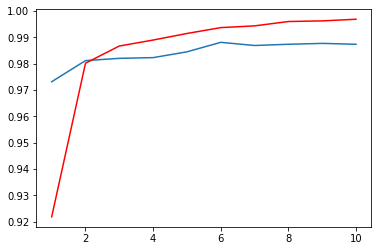

In [65]:
plt.figure(facecolor='w')
plt.plot(range(1,11), hist.history['val_accuracy'])
plt.plot(range(1,11), hist.history['accuracy'], c='red')
plt.show()

### 평가

In [66]:
test_loss, test_acc=model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [67]:
test_loss,test_acc

(0.03078149652924112, 0.9914)

### 모델 개선
 - 과적합: 모델을 단순화한다.
     - 모델의 네트워크를 작게 만든다. layer 개수를 줄이거나, filter/node의 개수를 줄인다. (filter의 크기는 보통 3`*`3 or 5`*`5 사이즈로 고정해놓음. node의 개수는 보통 2의 배수로 많이 사용)
     - dropout layer를 추가.
     - 데이터의 양을 늘린다.
 - 하이퍼파라미터 듀닝
     - 튜닝대상: optimizer를 변경.
     - optimizer의 학습률(learning rate)를 변경.

### prediction error가 발생한 example 확인 (예측이 틀린 예제 확인)

In [68]:
pred_test=model.predict_classes(X_test)  # 확률이 가장 높은 class를 반환

In [69]:
pred_test_proba=model.predict(X_test)  # 확률로 반환

In [73]:
pred_test[0], pred_test_proba[0]

(7, array([7.1049271e-11, 1.1614614e-11, 2.0523578e-09, 9.7609743e-08,
        4.0223852e-13, 4.6069620e-11, 1.4287125e-14, 9.9999976e-01,
        1.8983948e-10, 8.3855831e-08], dtype=float32))

In [74]:
pred_test.shape

(10000,)

In [77]:
np.not_equal(pred_test, test_label)

array([False, False, False, ..., False, False, False])

In [78]:
error_index=np.where(np.not_equal(pred_test, test_label))  # not_equal이 true인 값의 index를 반환
error_index

(array([ 340,  445,  659,  717,  726,  947,  965, 1014, 1232, 1242, 1319,
        1621, 1717, 1790, 1878, 1901, 2035, 2053, 2070, 2118, 2130, 2135,
        2182, 2225, 2293, 2447, 2462, 2488, 2597, 2654, 2743, 2896, 2939,
        2995, 3060, 3062, 3422, 3451, 3520, 3558, 3559, 3626, 3727, 3778,
        3985, 4075, 4176, 4201, 4248, 4360, 4507, 4571, 4740, 4807, 4823,
        4890, 5265, 5752, 5937, 5955, 5981, 5997, 6505, 6571, 6576, 6597,
        6625, 6755, 6783, 6847, 7847, 7856, 7902, 8094, 8128, 8321, 8408,
        8519, 9015, 9540, 9612, 9679, 9729, 9770, 9792, 9904], dtype=int64),)

In [80]:
pred_test[340], test_label[340]

(3, 5)

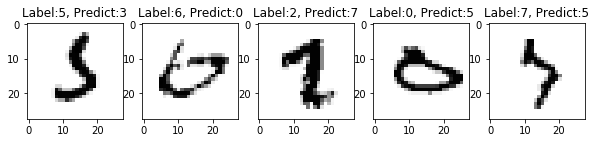

In [89]:
plt.figure(figsize=(10,5), facecolor='w')
# error 난 image 5개 보기
for i in range(5):
    idx=error_index[0][i]
    img=test_image[idx]
    
    plt.subplot(1, 5, i+1)
    plt.imshow(img, cmap='Greys')
    plt.title("Label:{}, Predict:{}".format(test_label[idx], pred_test[idx]))